In [ ]:
import numpy as np
a = int(input('Give amount: '))

def fib(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

fibo = list(fib(a))
train_len = len(fibo)*80//100
test_len = len(fibo)*10//100 + train_len
val_len = len(fibo)*10//100 + test_len
train = np.array(fibo[:train_len])
test = np.array(fibo[train_len:test_len])
val = np.array(fibo[test_len:val_len])

Give amount: 200


In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

gen_train = TimeseriesGenerator( train, train, length=15, batch_size=5, sampling_rate=1 )
gen_test = TimeseriesGenerator( test, test, length=15, batch_size=5, sampling_rate=1 )
gen_val = TimeseriesGenerator( val, val, length=15, batch_size=5, sampling_rate=1 )

print( "\n=== data_gen1: length=12, batch_size=2, sampling_rate=1 ===" )
list_x_train = []
list_y_train = []
for i in range( len(gen_train) ):
    x , y = gen_train[i]
    for i in x:
      list_x_train.append(list(i))
    for i in y:
      list_y_train.append(i)
    print( "\nindex ", i )
    print( "    x: {} {} \n{}".format( type(x), x.shape, x ) )
    print( "    y: {} {} \n{}".format( type(y), y.shape, y ) )

list_x_test = []
list_y_test = []
for i in range( len(gen_test) ):
    x , y = gen_test[i]
    for i in x:
      list_x_test.append(list(i))
    for i in y:
      list_y_test.append(i)
    print( "\nindex ", i )
    print( "    x: {} {} \n{}".format( type(x), x.shape, x ) )
    print( "    y: {} {} \n{}".format( type(y), y.shape, y ) )

list_x_val = []
list_y_val = []
for i in range( len(gen_val) ):
    x , y = gen_val[i]
    for i in x:
      list_x_val.append(list(i))
    for i in y:
      list_y_val.append(i)
    print( "\nindex ", i )
    print( "    x: {} {} \n{}".format( type(x), x.shape, x ) )
    print( "    y: {} {} \n{}".format( type(y), y.shape, y ) )


=== data_gen1: length=12, batch_size=2, sampling_rate=1 ===

index  4181
    x: <class 'numpy.ndarray'> (5, 15) 
[[0 1 1 2 3 5 8 13 21 34 55 89 144 233 377]
 [1 1 2 3 5 8 13 21 34 55 89 144 233 377 610]
 [1 2 3 5 8 13 21 34 55 89 144 233 377 610 987]
 [2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597]
 [3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584]]
    y: <class 'numpy.ndarray'> (5,) 
[ 610  987 1597 2584 4181]

index  46368
    x: <class 'numpy.ndarray'> (5, 15) 
[[5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181]
 [8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765]
 [13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946]
 [21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711]
 [34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657]]
    y: <class 'numpy.ndarray'> (5,) 
[ 6765 10946 17711 28657 46368]

index  514229
    x: <class 'numpy.ndarray'> (5, 15) 
[[55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368]
 [89 144

In [ ]:
print("\n=== Train data ===")
print( "len(gen_train) =", len( gen_train ) )
x_train , y_train = np.array(list_x_train), np.array(list_y_train)
# print( "Shape of x_train and y_train:" , x_train.shape, y_train.shape )
print( "Preview the first five rows:" )
for i in range(5):
    print( "    ", x_train[i] , y_train[i] )    

print("\n=== Test data ===")
print( "len(gen_test) =", len( gen_test ) )
x_test , y_test = np.array(list_x_test), np.array(list_y_test)
# print( "Shape of x_test and y_test:" , x_test.shape, y_test.shape )
print( "Preview the first five rows:" )
for i in range(5):
    print( "    ", x_test[i] , y_test[i] )    

print("\n=== Validation data ===")
print( "len(gen_test) =", len( gen_val ) )
x_val , y_val = np.array(list_x_val), np.array(list_y_val)
# print( "Shape of x_val and y_val:" , x_val.shape, y_val.shape )
print( "Preview the first five rows:" )
for i in range(5):
    print( "    ", x_val[i] , y_val[i] )   


=== Train data ===
len(gen_train) = 29
Preview the first five rows:
     [0 1 1 2 3 5 8 13 21 34 55 89 144 233 377] 610
     [1 1 2 3 5 8 13 21 34 55 89 144 233 377 610] 987
     [1 2 3 5 8 13 21 34 55 89 144 233 377 610 987] 1597
     [2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597] 2584
     [3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584] 4181

=== Test data ===
len(gen_test) = 1
Preview the first five rows:
     [1226132595394188293000174702095995 1983924214061919432247806074196061
 3210056809456107725247980776292056 5193981023518027157495786850488117
 8404037832974134882743767626780173 13598018856492162040239554477268290
 22002056689466296922983322104048463 35600075545958458963222876581316753
 57602132235424755886206198685365216 93202207781383214849429075266681969
 150804340016807970735635273952047185 244006547798191185585064349218729154
 394810887814999156320699623170776339 638817435613190341905763972389505493
 1033628323428189498226463595560281832] 167244575904137984013222

In [ ]:
x_train

array([[0, 1, 1, ..., 144, 233, 377],
       [1, 1, 2, ..., 233, 377, 610],
       [1, 2, 3, ..., 377, 610, 987],
       ...,
       [212207101440105399533740733471, 343358302784187294870275058337,
        555565404224292694404015791808, ...,
        68330027629092351019822533679447,
        110560307156090817237632754212345,
        178890334785183168257455287891792],
       [343358302784187294870275058337, 555565404224292694404015791808,
        898923707008479989274290850145, ...,
        110560307156090817237632754212345,
        178890334785183168257455287891792,
        289450641941273985495088042104137],
       [555565404224292694404015791808, 898923707008479989274290850145,
        1454489111232772683678306641953, ...,
        178890334785183168257455287891792,
        289450641941273985495088042104137,
        468340976726457153752543329995929]], dtype=object)

In [ ]:
# # Create three arrays (each with time_steps=10, output_dim=3)
# time_steps = x_train.shape[1]
# y_train_temp = np.zeros( ( y_train.shape[0], time_steps, 3) , dtype=np.float32 )
# y_test_temp = np.zeros( ( y_test.shape[0], time_steps, 3) , dtype=np.float32 )
# y_val_temp = np.zeros( ( y_val.shape[0], time_steps, 3) , dtype=np.float32 )

# # Fill the three new arrays with the first predicted numbers (for the last time step only) 
# y_train_temp[ : , -1, 0 ] = y_train[ : ]
# y_test_temp[ : , -1, 0 ] = y_test[ : ]
# y_val_temp[ : , -1, 0 ] = y_val[ : ]

# # For the last time step only, compute values for the second and third predicted numbers
# y_train_temp[ : , -1, 1 ] = y_train_temp[ : , -1, 0 ]
# y_train_temp[ : , -1, 2 ] = y_train_temp[ : , -1, 0 ]
# y_test_temp[ : , -1, 1 ] = y_test_temp[ : , -1, 0 ]
# y_test_temp[ : , -1, 2 ] = y_test_temp[ : , -1, 0 ]
# y_val_temp[ : , -1, 1 ] = y_val_temp[ : , -1, 0 ]
# y_val_temp[ : , -1, 2 ] = y_val_temp[ : , -1, 0 ]

# # Fill vectors of 3 predicted numbers to the remaining time steps
# for t in range(time_steps-2, -1, -1):
#     y_train_temp[ : , t, : ] = y_train_temp[ : , t+1, : ]
#     y_test_temp[ : , t, : ] = y_test_temp[ : , t+1, : ]
#     y_val_temp[ : , t, : ] = y_val_temp[ : , t+1, : ]

    
# # Preview the Before-After results
# print( "======== y_train ========" )
# print( "\nShape: before={} after={}".format( y_train.shape, y_train_temp.shape ) )
# print( "\nThe first two rows:" )
# print( "\tBefore: row[0]: " , y_train[0] )
# print( "\tBefore: row[1]: " , y_train[1] )
# print( "\n\tAfter: row[0]: " , y_train_temp[0] )
# print( "\tAfter: row[1]: " , y_train_temp[1] )
# #
# print( "\n======== y_test ========" )
# print( "\nShape: before={} after={}".format( y_test.shape, y_test_temp.shape ) )
# print( "\nThe first two rows:" )
# print( "\tBefore: row[0]: " , y_test[0] )
# print( "\tBefore: row[1]: " , y_test[1] )
# print( "\n\tAfter: row[0]: " , y_test_temp[0] )
# print( "\tAfter: row[1]: " , y_test_temp[1] )
# #
# print( "\n======== y_val ========" )
# print( "\nShape: before={} after={}".format( y_val.shape, y_val_temp.shape ) )
# print( "\nThe first two rows:" )
# print( "\tBefore: row[0]: " , y_val[0] )
# print( "\tBefore: row[1]: " , y_val[1] )
# print( "\n\tAfter: row[0]: " , y_val_temp[0] )
# print( "\tAfter: row[1]: " , y_val_temp[1] )

In [ ]:
x_train

array([[0, 1, 1, ..., 144, 233, 377],
       [1, 1, 2, ..., 233, 377, 610],
       [1, 2, 3, ..., 377, 610, 987],
       ...,
       [212207101440105399533740733471, 343358302784187294870275058337,
        555565404224292694404015791808, ...,
        68330027629092351019822533679447,
        110560307156090817237632754212345,
        178890334785183168257455287891792],
       [343358302784187294870275058337, 555565404224292694404015791808,
        898923707008479989274290850145, ...,
        110560307156090817237632754212345,
        178890334785183168257455287891792,
        289450641941273985495088042104137],
       [555565404224292694404015791808, 898923707008479989274290850145,
        1454489111232772683678306641953, ...,
        178890334785183168257455287891792,
        289450641941273985495088042104137,
        468340976726457153752543329995929]], dtype=object)

In [ ]:
y_train

array([610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368,
       75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309,
       3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986,
       102334155, 165580141, 267914296, 433494437, 701408733, 1134903170,
       1836311903, 2971215073, 4807526976, 7778742049, 12586269025,
       20365011074, 32951280099, 53316291173, 86267571272, 139583862445,
       225851433717, 365435296162, 591286729879, 956722026041,
       1548008755920, 2504730781961, 4052739537881, 6557470319842,
       10610209857723, 17167680177565, 27777890035288, 44945570212853,
       72723460248141, 117669030460994, 190392490709135, 308061521170129,
       498454011879264, 806515533049393, 1304969544928657,
       2111485077978050, 3416454622906707, 5527939700884757,
       8944394323791464, 14472334024676221, 23416728348467685,
       37889062373143906, 61305790721611591, 99194853094755497,
       160500643816367088, 259695496911122585, 4

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#x_minmax_norm = MinMaxScaler().fit( x_train )
len_last_x = len(x_train[len(x_train)-1])
val_x_max = x_train[len(x_train)-1][len_last_x-1]
x_min = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ] )
x_max = np.array([ val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max, val_x_max ] )

len_last_x_test = len(x_test[len(x_test)-1])
val_x_test_max = x_test[len(x_test)-1][len_last_x_test-1]
x_test_max = np.array([ val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max, val_x_test_max ] )

print( "x min-max:" , x_min , x_max ) 
print("x test max:", x_test_max)
y_minmax_norm = MinMaxScaler().fit( y_train.reshape((y_train.shape[0], 1 )))
print( "y min-max:" , y_minmax_norm.data_min_ , y_minmax_norm.data_max_ ) 

y_train [ ... ] = ( y_train [...] - y_minmax_norm.data_min_ ) / ( y_minmax_norm.data_max_ - y_minmax_norm.data_min_ )
y_test [ ... ] = ( y_test [...] - y_minmax_norm.data_min_ ) / ( y_minmax_norm.data_max_ - y_minmax_norm.data_min_ )
y_val [ ... ] = ( y_val [...] - y_minmax_norm.data_min_ ) / ( y_minmax_norm.data_max_ - y_minmax_norm.data_min_ )

x_train[ ... ] = ( x_train [...] - x_min ) / ( x_max - x_min )
x_test[ ... ] = ( x_test [...] - x_min ) / ( x_test_max - x_min )
x_val[ ... ] = ( x_val [...] - x_min ) / ( x_max - x_min )

x min-max: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [468340976726457153752543329995929 468340976726457153752543329995929
 468340976726457153752543329995929 468340976726457153752543329995929
 468340976726457153752543329995929 468340976726457153752543329995929
 468340976726457153752543329995929 468340976726457153752543329995929
 468340976726457153752543329995929 468340976726457153752543329995929
 468340976726457153752543329995929 468340976726457153752543329995929
 468340976726457153752543329995929 468340976726457153752543329995929
 468340976726457153752543329995929]
x test max: [7084593923980518516849609894969925639
 7084593923980518516849609894969925639
 7084593923980518516849609894969925639
 7084593923980518516849609894969925639
 7084593923980518516849609894969925639
 7084593923980518516849609894969925639
 7084593923980518516849609894969925639
 7084593923980518516849609894969925639
 7084593923980518516849609894969925639
 7084593923980518516849609894969925639
 70845939239805185168496098949699256

In [ ]:
# import pandas as pd
# df_x_train = pd.DataFrame(x_train)
# df_y_train = pd.DataFrame(y_train)

In [ ]:
print("Dimension before changed:")
print( x_train.shape )
print( x_test.shape )
print( x_val.shape )

x_train = x_train[ ..., np.newaxis ]
x_test = x_test[ ..., np.newaxis ]
x_val = x_val[ ..., np.newaxis ]

print("\nDimension after changed:")
print( x_train.shape )
print( x_test.shape )
print( x_val.shape )

# Convert everything to the default of float32
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_val = x_val.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_val = y_val.astype(np.float32)

Dimension before changed:
(145, 15)
(5, 15)
(5, 15)

Dimension after changed:
(145, 15, 1)
(5, 15, 1)
(5, 15, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

my_rnn = Sequential()

# batch_size=None, time_steps=None, input_dim=1
my_rnn.add( SimpleRNN( units=30, input_shape=(None,1), return_sequences=True ) )   # RNN layer 1

my_rnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_20 (SimpleRNN)    (None, None, 30)          960       
Total params: 960
Trainable params: 960
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_rnn.add( SimpleRNN( units=20, return_sequences=True ) )    # RNN layer 2
my_rnn.add( SimpleRNN( units=10 ) )    # RNN layer 3


# Use the default 'linear activation'
my_rnn.add( Dense(5) )

my_rnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_20 (SimpleRNN)    (None, None, 30)          960       
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, None, 20)          1020      
_________________________________________________________________
simple_rnn_22 (SimpleRNN)    (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
Total params: 2,345
Trainable params: 2,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mean_squared_error

adam = Adam(lr=0.01)
my_rnn.compile( loss="mse", optimizer=adam, metrics=[mean_squared_error] )

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('./RNN_best.hdf5', save_best_only=True, monitor="val_loss", mode='min', save_weights_only=False)
hist = my_rnn.fit(x_train, y_train, batch_size=16, epochs=100, callbacks=[checkpoint])

Epoch 1/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1323 - mean_squared_error: 0.1456
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0090 - mean_squared_error: 0.0097
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0054 - mean_squared_error: 0.0059
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0020 - mean_squared_error: 0.0022
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0013 - mean_squared_error: 0.0015
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 8.5609e-04 - mean_squared_error: 9.4151e-04
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 5.8821e-04 - mean_squared_error: 6.4660e-04
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 3.5354e-04 - mean_squared_error: 3.8833e-04
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 2.7680e-04 - mean_squared_error

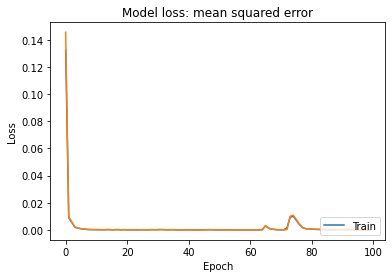

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline                

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['mean_squared_error'])
plt.title('Model loss: mean squared error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Evaluate the model from the last epoch
score = my_rnn.evaluate( x_test, y_test, verbose=0 )

In [ ]:
y_test_predict = my_rnn.predict( x_test ) # last epoch

# Denormalize the value
y_inv = y_minmax_norm.inverse_transform( y_test_predict )

# Round all float values to their closest integers
y_inv = np.around( y_inv )

In [ ]:
x_test

array([[[1.7307028e-04],
        [2.8003359e-04],
        [4.5310386e-04],
        [7.3313742e-04],
        [1.1862413e-03],
        [1.9193788e-03],
        [3.1056199e-03],
        [5.0249989e-03],
        [8.1306184e-03],
        [1.3155618e-02],
        [2.1286236e-02],
        [3.4441855e-02],
        [5.5728089e-02],
        [9.0169944e-02],
        [1.4589803e-01]],

       [[2.8003359e-04],
        [4.5310386e-04],
        [7.3313742e-04],
        [1.1862413e-03],
        [1.9193788e-03],
        [3.1056199e-03],
        [5.0249989e-03],
        [8.1306184e-03],
        [1.3155618e-02],
        [2.1286236e-02],
        [3.4441855e-02],
        [5.5728089e-02],
        [9.0169944e-02],
        [1.4589803e-01],
        [2.3606798e-01]],

       [[4.5310386e-04],
        [7.3313742e-04],
        [1.1862413e-03],
        [1.9193788e-03],
        [3.1056199e-03],
        [5.0249989e-03],
        [8.1306184e-03],
        [1.3155618e-02],
        [2.1286236e-02],
        [3.4441855e-0

In [ ]:
y_test_predict

array([[0.17421532, 0.15366626, 0.17595239, 0.15701266, 0.1549849 ],
       [0.2803684 , 0.2520463 , 0.28201836, 0.25671044, 0.25387347],
       [0.4433234 , 0.41235945, 0.4421344 , 0.41696122, 0.41499624],
       [0.6702673 , 0.65671897, 0.6592938 , 0.657439  , 0.6608153 ],
       [0.91836023, 0.95305055, 0.88879025, 0.94280446, 0.96245944]],
      dtype=float32)

In [ ]:
y_inv

array([[1.3201891e+32, 1.1644700e+32, 1.3333524e+32, 1.1898288e+32,
        1.1744626e+32],
       [2.1246082e+32, 1.9099856e+32, 2.1371116e+32, 1.9453301e+32,
        1.9238319e+32],
       [3.3594675e+32, 3.1248253e+32, 3.3504576e+32, 3.1596973e+32,
        3.1448068e+32],
       [5.0792293e+32, 4.9765611e+32, 4.9960730e+32, 4.9820177e+32,
        5.0076029e+32],
       [6.9592571e+32, 7.2221375e+32, 6.7351784e+32, 7.1444932e+32,
        7.2934367e+32]], dtype=float32)

In [ ]:
x_test.shape

(5, 15, 1)

In [ ]:
test.shape

(15, 1)

In [ ]:
# test